In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
test = pd.read_csv('dataset/test.csv', encoding='ISO-8859-1')
train = pd.read_csv('dataset/train.csv', encoding='ISO-8859-1')
print(train.head())
print(train.describe())
print(train.info())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0    

In [49]:
train.sample(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
2616,255d4695a6,sorry for taking over twitter with my i-can`t-...,sorry,negative,morning,0-20,Brunei,437479,5270.0,83
18062,c1ca63de20,Making egg tart & Chinese egg pudding. Yum,Yum,positive,night,31-45,Czechia (Czech Republic),10708981,77240.0,139
10476,687037af5c,ooops! the last link is the same as the first...,ooops!,negative,morning,0-20,Mauritania,4649658,1030700.0,5
17379,7854deb3c9,Happy mothers day to all the mums!,Happy,positive,morning,46-60,Qatar,2881053,11610.0,248
12454,8aab9d8a17,i think its like 1million degrees here <3,i think its like 1million degrees here <3,neutral,noon,60-70,Azerbaijan,10139177,82658.0,123


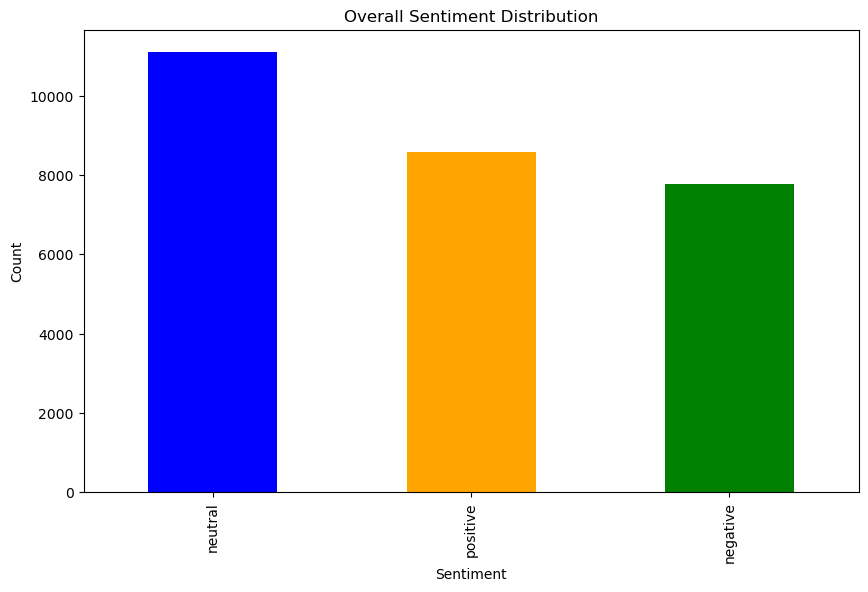

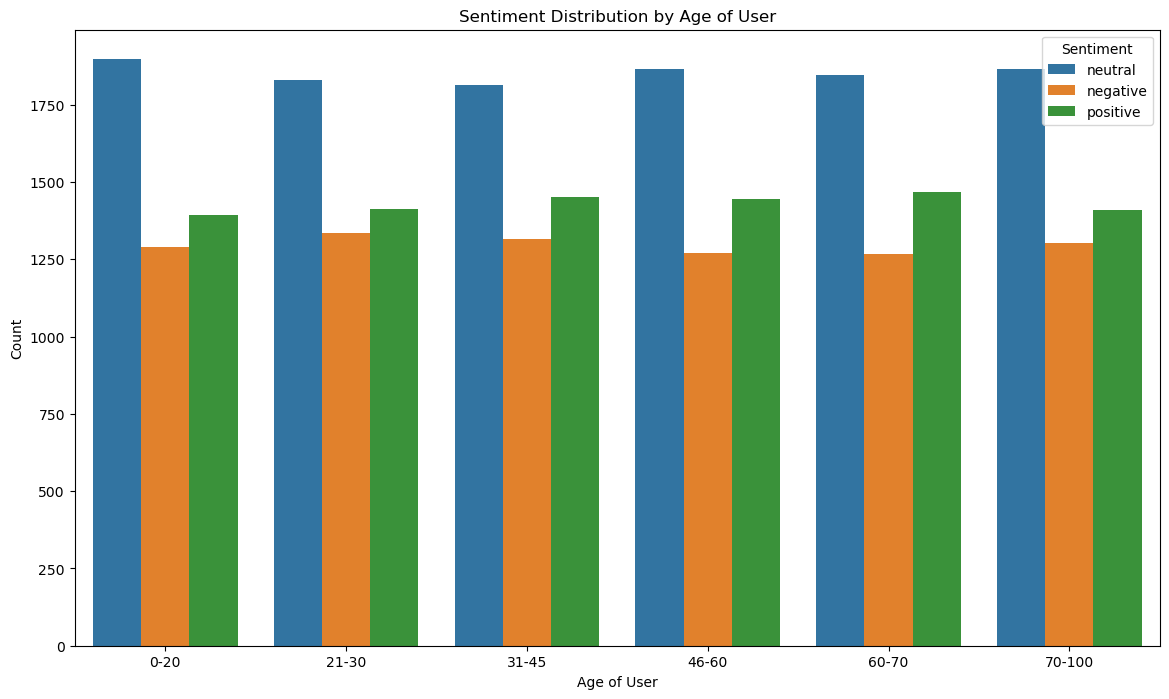

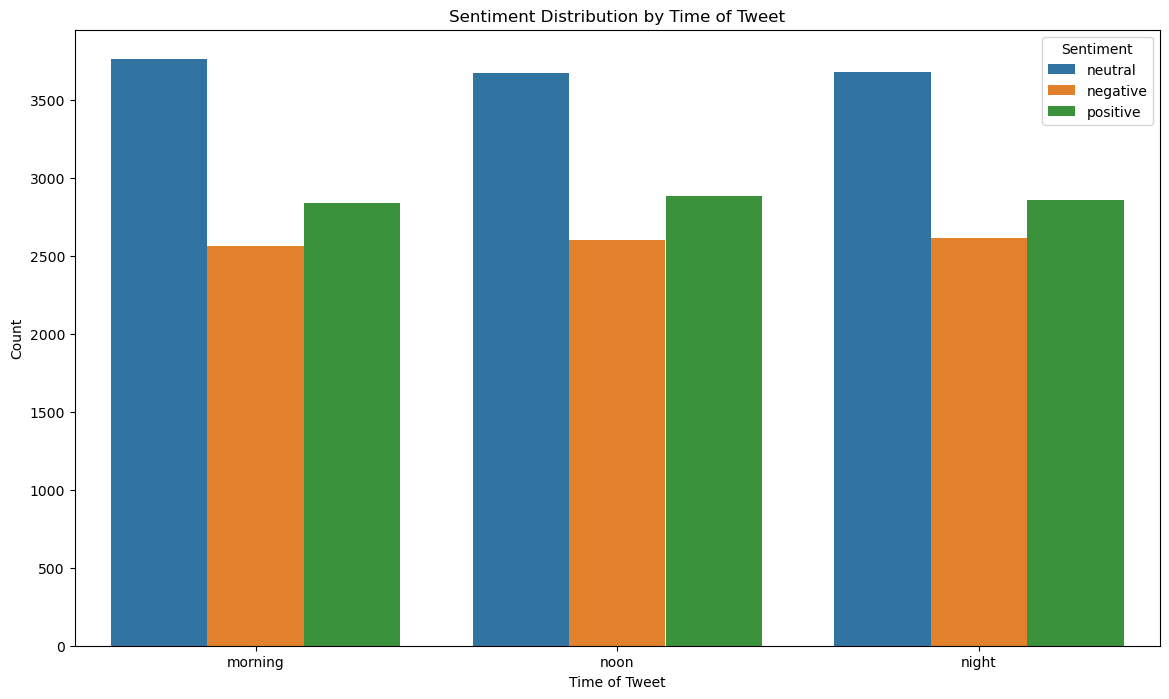

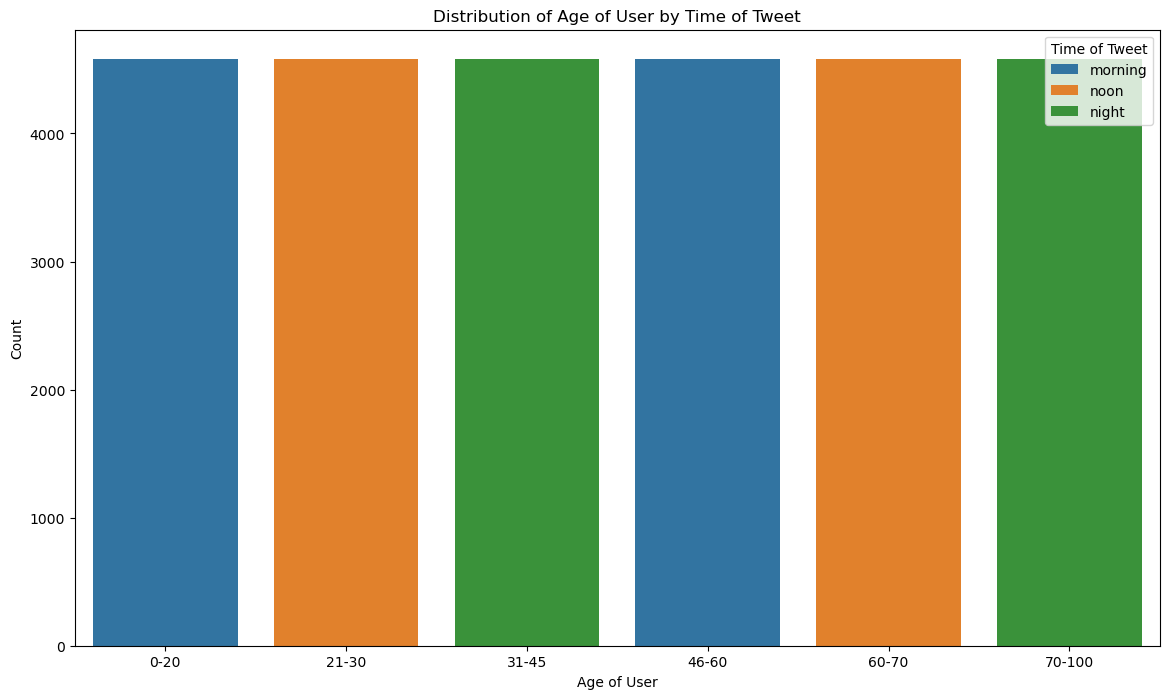

In [50]:
import seaborn as sns
# Sentiment distribution overall
plt.figure(figsize=(10, 6))
train['sentiment'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sentiment distribution by Age of User
plt.figure(figsize=(14, 8))
sns.countplot(data=train, x='Age of User', hue='sentiment')
plt.title('Sentiment Distribution by Age of User')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Sentiment distribution by Time of Tweet
plt.figure(figsize=(14, 8))
sns.countplot(data=train, x='Time of Tweet', hue='sentiment')
plt.title('Sentiment Distribution by Time of Tweet')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Sentiment distribution by Age of User and Time of Tweet
plt.figure(figsize=(14, 8))
sns.countplot(data=train, x='Age of User', hue='Time of Tweet')
plt.title('Distribution of Age of User by Time of Tweet')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.legend(title='Time of Tweet')
plt.show()

In [51]:
train['text'].sample(5) 

16541     i know ridiculous! we never got to hang out  ...
11621     i thought people only went to hounslow when t...
77                                       My sources say no
1413      Thanks, I just found a article that say i can...
19896     I was gonna go for aiden but I had a girl so ...
Name: text, dtype: object

In [52]:
train.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [53]:
train.dropna(inplace=True)

In [54]:
train.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [58]:
# text preprocessing helper function
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

def clean_text(text):
    # remove urls
    text = re.sub(r'http\S+', '', text)
    # remove html tags
    text = re.sub(r'<.*?>', '', text)
    # remove digits
    text = re.sub(r'\d+', '', text)
    # remove hashtags
    text = re.sub(r'#\w+', '', text)
    # remove mentions
    text = re.sub(r'@\w+', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove whitespace
    text = text.strip()
    # remove stopwords
    # stop_words = set(stopwords.words('english'))
    # words = word_tokenize(text)
    # text = ' '.join([word for word in words if word.lower() not in stop_words])
    return text

In [60]:
import nltk
nltk.download('punkt')

# fill NaN values with empty string
train['text'] = train['text'].fillna('')
test['text'] = test['text'].fillna('')

# apply text cleaning to the text column
train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)
train['text'].sample(5)

[nltk_data] Downloading package punkt to /home/kelvin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


21217                                wants to be sunbathin
26173    Peace Bro thanks for not just the music but pr...
26812                           ok bye alex have fun today
26631            Lol Thanks Penny Im trying to believe you
12054                               oh thats cool   Thanks
Name: text, dtype: object

In [61]:
# comparing with textblob
from textblob import TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
train['textblob_sentiment'] = train['text'].apply(get_textblob_sentiment)
train.sample(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),textblob_sentiment
8727,97b1409906,Dionusia made me do it,http://bit.ly/NYhMZ Dionusia made me do it,neutral,morning,46-60,Tajikistan,9537645,139960.0,68,neutral
844,647e680fec,It just had to rain on me almost a perfect day...,It just had to rain on me,negative,noon,60-70,Germany,83783942,348560.0,240,positive
13542,7af6be2883,Friday and its raining,Friday and it`s raining,neutral,morning,0-20,Yemen,29825964,527970.0,56,neutral
20117,00ea396ca7,got to clean the bathroom today,got to clean the bathroom today.,neutral,night,70-100,Laos,7275560,230800.0,32,positive
11566,7df6d02914,requires python but yeah as i tweeted yesterd...,"requires python... but yeah, as i tweeted yes...",neutral,noon,60-70,Côte d'Ivoire,26378274,318000.0,83,neutral


In [62]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
def plot_wordcloud(text):
    wordcloud = WordCloud( background_color="white").generate(text)
    plt.figure( figsize=(7,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('wordcloud for tweets')
    plt.show() 

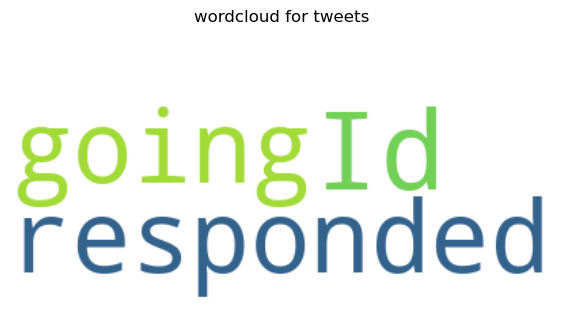

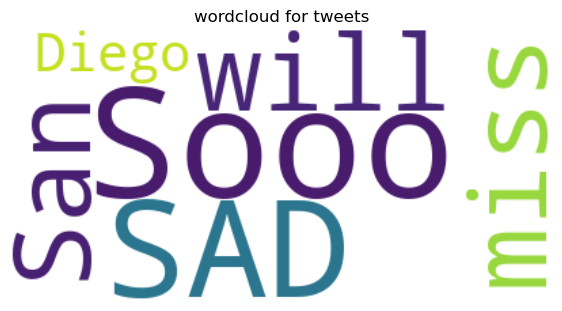

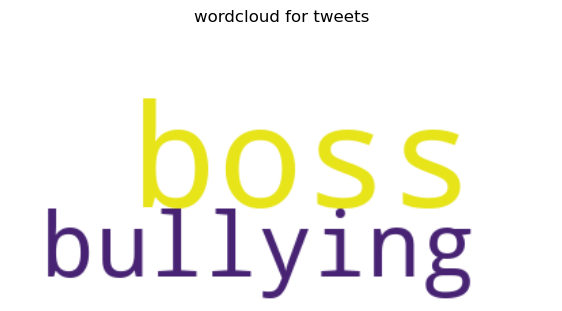

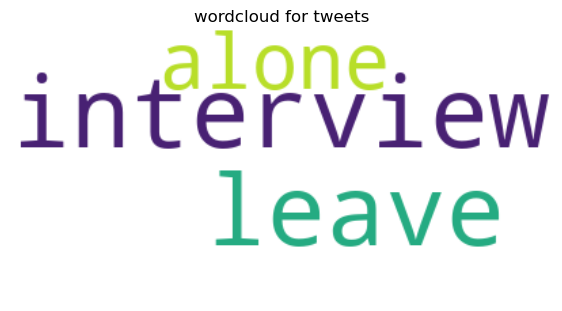

In [ ]:
for i in range(4):
    plot_wordcloud(train['text'].iloc[i])

In [68]:
test = test.dropna()

In [65]:
# convert the text data into numerical data that can be fed into the model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


x_train = train['text']
y_train = train['sentiment']
x_val = test['text']
y_val = test['sentiment']

# Remove rows with NaN values in y_val
valid_idx = y_val.dropna().index
x_val = x_val.loc[valid_idx]
y_val = y_val.loc[valid_idx]


# Encode the target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

# convert text data to numerical sequences
x_train = tokenizer.texts_to_sequences(x_train)
x_val = tokenizer.texts_to_sequences(x_val)
# pad the sequences to have the same length
x_train_padded = pad_sequences(x_train, padding='post', maxlen=200)
x_val = pad_sequences(x_val, padding='post', maxlen=200)

# convert the target data to numerical data
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)


In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import datetime
import os

#  Define embedding and vocab size
embedding_dim = 32
vocab_size = len(word_index) + 1
max_words = 200

#  TensorBoard setup
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

#  Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#  Building an optimized RNN model
RNN_model = Sequential(name="Sentiment_RNN")
RNN_model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        input_length=max_words))

#  Using Bidirectional LSTM for better performance
RNN_model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))
RNN_model.add(Dropout(0.4))

RNN_model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=False)))
RNN_model.add(Dropout(0.4))

#  Output layer for 3 classes (positive, negative, neutral)
RNN_model.add(Dense(3, activation='softmax'))

#  Model summary
print(RNN_model.summary())
# tf.keras.utils.plot_model(RNN_model, to_file='RNN_model.png', show_shapes=True)

#  Optimizer with hyperparameter tuning
adam_optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

#  Compiling the model
RNN_model.compile(
    loss="categorical_crossentropy",
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

#  Training the model with TensorBoard and EarlyStopping
history = RNN_model.fit(
    x_train_padded, y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard_callback, early_stopping]
)


/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Sentiment_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - accuracy: 0.5200 - loss: 0.9429 - val_accuracy: 0.7020 - val_loss: 0.6878
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 50s 117ms/step - accuracy: 0.7494 - loss: 0.6272 - val_accuracy: 0.7168 - val_loss: 0.6798
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 55s 128ms/step - accuracy: 0.8330 - loss: 0.4508 - val_accuracy: 0.7088 - val_loss: 0.7251
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 55s 128ms/step - accuracy: 0.8843 - loss: 0.3313 - val_accuracy: 0.7026 - val_loss: 0.7663
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 61s 143ms/step - accuracy: 0.9080 - loss: 0.2699 - val_accuracy: 0.6879 - val_loss: 0.8920



Simple_RNN Score --->  [0.6795759797096252, 0.7190153002738953]
 Model Saved Successfully!
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.64      0.70      1001
     Neutral       0.66      0.73      0.69      1430
    Positive       0.77      0.78      0.77      1103

    accuracy                           0.72      3534
   macro avg       0.73      0.72      0.72      3534
weighted avg       0.72      0.72      0.72      3534



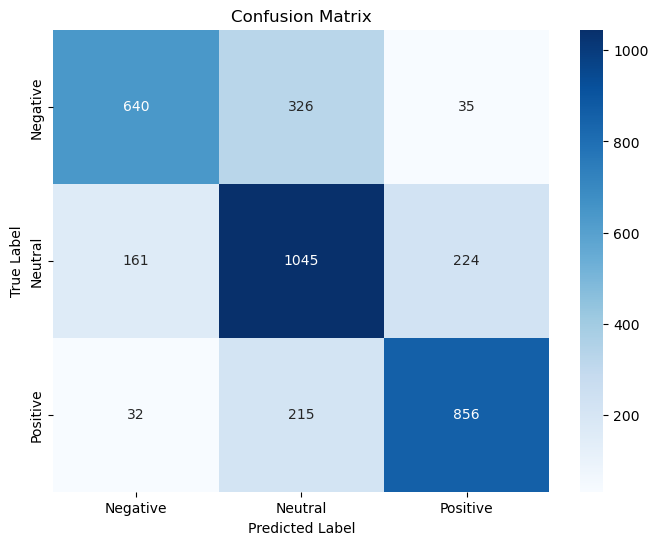

In [74]:

#  Evaluate the model
print("\nSimple_RNN Score ---> ", RNN_model.evaluate(x_val, y_val, verbose=0))

#  Save the model
RNN_model.save("Sentiment_RNN.h5")
print(" Model Saved Successfully!")


y_pred = np.argmax(RNN_model.predict(x_val), axis=1)
y_true = np.argmax(y_val, axis=1)


print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [77]:

test_samples = [
    "I love nature and all the animals in it",
    "Worst day ever fell like giving up , I hate my life",
    
]

#  Preprocess and predict
test_samples_seq = tokenizer.texts_to_sequences(test_samples)
test_samples_pad = tf.keras.preprocessing.sequence.pad_sequences(test_samples_seq, maxlen=max_words)

predictions = RNN_model.predict(test_samples_pad)
predicted_classes = np.argmax(predictions, axis=1)

#  Output Predictions
for i, review in enumerate(test_samples):
    sentiment = ["Negative", "Neutral", "Positive"][predicted_classes[i]]
    print(f"tweet: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
tweet: I love nature and all the animals in it
Predicted Sentiment: Neutral
--------------------------------------------------
tweet: Worst day ever fell like giving up , I hate my life
Predicted Sentiment: Neutral
--------------------------------------------------


In [79]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN

#  Define embedding and vocab size
embedding_dim = 32
vocab_size = len(word_index) + 1
max_words = 200

#  TensorBoard setup
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

#  Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#  Building the Vanilla RNN Model
RNN_model = Sequential(name="Vanilla_RNN")
RNN_model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        input_length=max_words))

#  Using SimpleRNN (Vanilla RNN)
RNN_model.add(SimpleRNN(128, activation='tanh', return_sequences=True))
RNN_model.add(Dropout(0.4))

RNN_model.add(SimpleRNN(64, activation='tanh', return_sequences=False))
RNN_model.add(Dropout(0.3))

# RNN_model.add(SimpleRNN(32, activation='tanh', return_sequences=False))
# RNN_model.add(Dropout(0.3))

#  Output Layer for 3 Classes
RNN_model.add(Dense(3, activation='softmax'))

#  Model Summary
print(RNN_model.summary())

#  Optimizer with learning rate tuning
adam_optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

#  Compile the model
RNN_model.compile(
    loss="categorical_crossentropy",
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

#  Train the model
history = RNN_model.fit(
    x_train_padded, y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard_callback, early_stopping]
)

#  Evaluate the model
print("\nVanilla RNN Score ---> ", RNN_model.evaluate(x_val, y_val, verbose=0))





/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Vanilla_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20


I0000 00:00:1741600425.536507   12216 service.cc:148] XLA service 0x7ff2206d5dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741600425.537636   12216 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-10 09:53:45.681319: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


  1/430 ━━━━━━━━━━━━━━━━━━━━ 1:14:11 10s/step - accuracy: 0.2969 - loss: 1.2371

I0000 00:00:1741600431.963535   12216 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


430/430 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.3486 - loss: 1.1941 - val_accuracy: 0.4046 - val_loss: 1.0911
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.3591 - loss: 1.1209 - val_accuracy: 0.4046 - val_loss: 1.0884
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.4019 - loss: 1.0910 - val_accuracy: 0.4046 - val_loss: 1.0891
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.4045 - loss: 1.0891 - val_accuracy: 0.4046 - val_loss: 1.0876
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.4049 - loss: 1.0885 - val_accuracy: 0.4046 - val_loss: 1.0886
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.4074 - loss: 1.0878 - val_accuracy: 0.4046 - val_loss: 1.0879
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.4088 - loss: 1.0889 - val_accuracy: 0.4046 - val_loss: 1.0892

Vanilla RNN Score --->  [1.0876127481460571, 0.40464064478874207]


111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1001
     Neutral       0.40      1.00      0.58      1430
    Positive       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534



/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

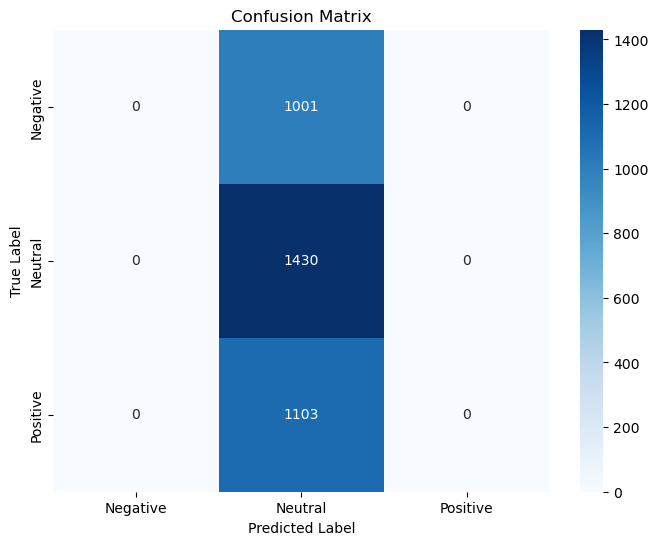

Review: I love nature and all the animals in it
Predicted Sentiment: Neutral
--------------------------------------------------
Review: Worst day ever fell like giving up , I hate my life
Predicted Sentiment: Neutral
--------------------------------------------------


In [80]:

y_pred = np.argmax(RNN_model.predict(x_val), axis=1)
y_true = np.argmax(y_val, axis=1)


print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


for i, review in enumerate(test_samples):
    sentiment = ["Negative", "Neutral", "Positive"][predicted_classes[i]]
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 50)


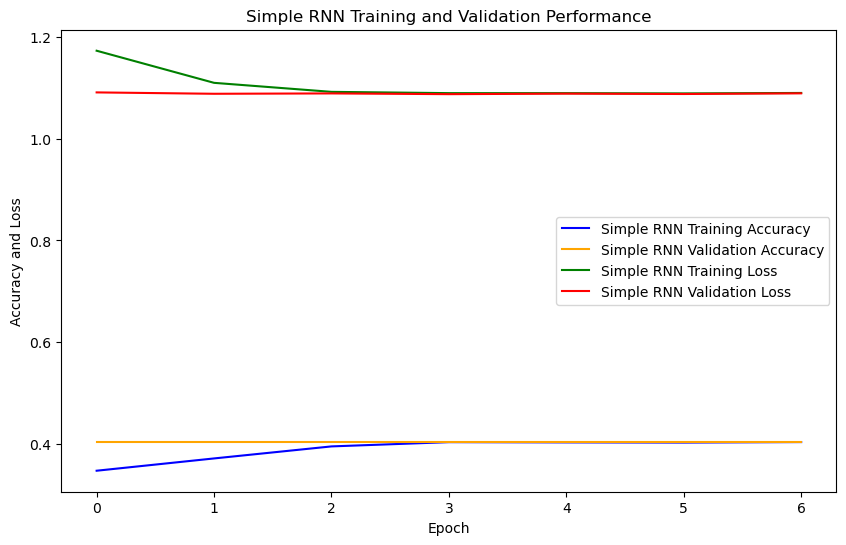

In [81]:
# compare simple rnn and lstm
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Simple RNN Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Simple RNN Validation Accuracy', color='orange')
plt.plot(history.history['loss'], label='Simple RNN Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Simple RNN Validation Loss', color='red')
plt.title('Simple RNN Training and Validation Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()

In [4]:
%load_ext tensorboard

In [6]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6009 (pid 48895), started 0:00:11 ago. (Use '!kill 48895' to kill it.)